In [1]:
# import
from music21 import *
import random
import numpy as np

In [2]:
loop_seq_num = 48
loop_num = 1

In [3]:
loop_candi = np.random.choice(4, loop_seq_num, p=[0, 0.2, 0.3, 0.5]) ## candidates by probability distribution of loop
print(loop_candi)

[3 3 3 3 3 2 2 2 3 3 1 3 3 3 2 3 3 1 2 1 2 3 2 3 3 3 3 1 1 3 2 2 3 3 1 1 1
 2 3 3 3 3 3 3 3 2 3 3]


In [4]:
loop_seq = [0] * loop_seq_num

In [5]:
seq_sign = 1
loop_seq[0] = loop_candi[0]
for i in range(1, loop_seq_num-1):
    if loop_seq[i] >= 4:
        seq_sign = -1
    elif loop_seq[i] <= -4:
        seq_sign = 1
    else:
        seq_sign = random.choice([-1, 1])
    loop_seq[i+1] = loop_seq[i] + loop_candi[i] * seq_sign
print(loop_seq)

[3, 0, 3, 0, -3, 0, -2, -4, -2, -5, -2, -1, -4, -1, 2, 0, 3, 0, 1, 3, 2, 0, 3, 5, 2, 5, 2, 5, 4, 3, 0, -2, -4, -1, 2, 3, 2, 3, 1, -2, -5, -2, -5, -2, -5, -2, -4, -1]


In [6]:
loop_stream = stream.Part()
tsThreeFour = meter.TimeSignature('3/4')
loop_stream.append(tsThreeFour)

In [7]:
note_rest = note.Rest()
note_rest.quarterLength = 3
loop_stream.append(note_rest)

In [8]:
for loop_i in range(0, loop_num):
    if loop_i == 0:
        loop_temp_midi = note.Note("C5").pitch.midi

    loop_note = [0] * loop_seq_num
    for i in range(loop_seq_num):
        loop_note[i] = note.Note("C5")
        loop_note[i].duration.quarterLength = 0.5
    
    if loop_i == 0:
        loop_note[0].duration.quarterLength = 1
    loop_stream.append(loop_note[0])
    
    for i in range(1, loop_seq_num-1):
        loop_note[i+1].pitch.midi = loop_note[0].pitch.midi + loop_seq[i]
        loop_stream.append(loop_note[i+1])
    loop_temp_midi = loop_note[-1].pitch.midi

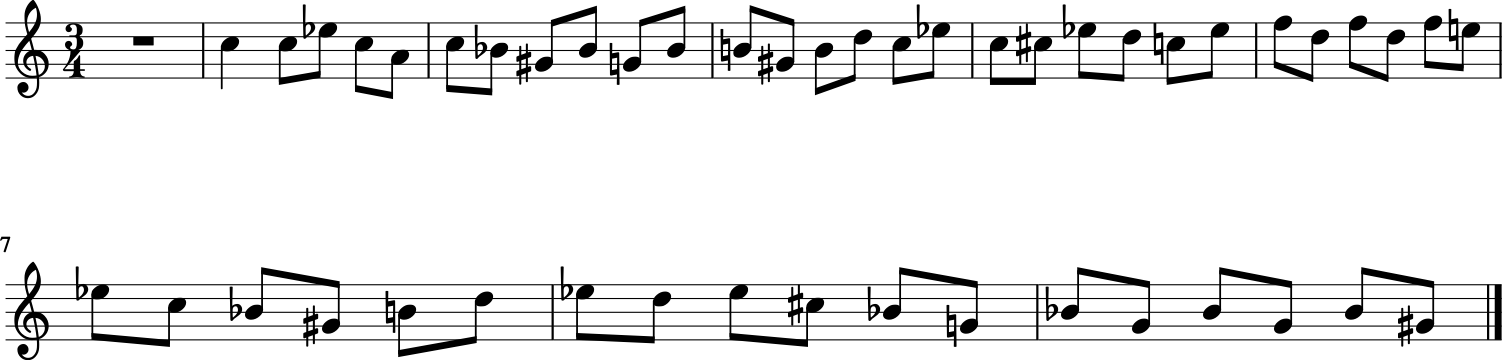

In [9]:
loop_stream.show()
loop_stream.show('midi')
# fp = loop_stream.write('midi', fp='/Users/pjunhyukmac/workspace-code/CSI6591/hw4/results/test1.mid')

In [10]:
loop_stream_2 = stream.Part()
tsThreeFour = meter.TimeSignature('3/4')
loop_stream_2.append(tsThreeFour)

In [11]:
note_rest_2 = note.Rest()
note_rest_2.quarterLength = 3
loop_stream_2.append(note_rest_2)

In [12]:
loop_seq_gap = [2, 6, 8, 12, 14, 18, 24, 26, 30, 32, 36, 38, 42, 48]
for loop_i in range(0, loop_num):
    if loop_i == 0:
        loop_temp_midi = note.Note("C3").pitch.midi

    loop_note = [0] * loop_seq_num
    for i in range(loop_seq_num):
        loop_note[i] = note.Note("C3")
        loop_note[i].duration.quarterLength = 0.5
    
    loop_note[0].pitch.midi = loop_temp_midi
    loop_note[0].duration.quarterLength = 1
    loop_stream_2.append(loop_note[0])
    
    for j in range(len(loop_seq_gap)-1):
        i = loop_seq_gap[j]
        loop_note[i+1].pitch.midi = loop_note[0].pitch.midi + loop_seq[i-1]
        loop_note[i+1].duration.quarterLength = 0.5 * (loop_seq_gap[j+1] - loop_seq_gap[j])
        
        if not(loop_i == loop_num-1 and j == len(loop_seq_gap)-3):
            loop_stream_2.append(loop_note[i+1])
        else:
            loop_note[i+1].duration.quarterLength = 5
            loop_stream_2.append(loop_note[i+1])
            break
    loop_temp_midi = loop_note[-1].pitch.midi

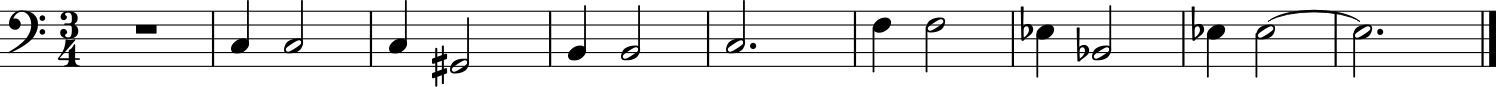

In [13]:
loop_stream_2.show()
loop_stream_2.show('midi')

In [14]:
score = stream.Score()
score.append(loop_stream)
score.append(loop_stream_2)

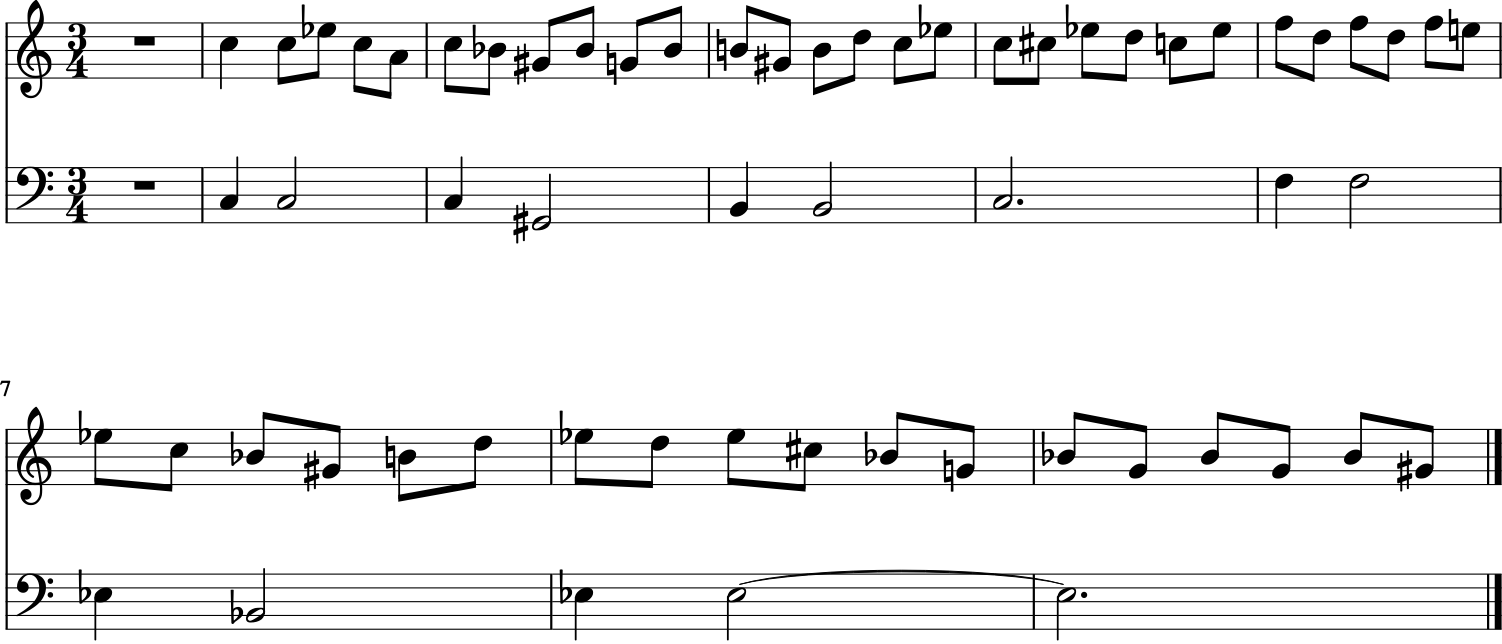

In [15]:
score.show()
score.show('midi')
fp = score.write('midi', fp='/Users/pjunhyukmac/workspace-code/CSI6591/hw4/results/result.mid')